<a href="https://colab.research.google.com/github/nestorm94/SIS_COMP_2023_1/blob/main/Kuramoto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

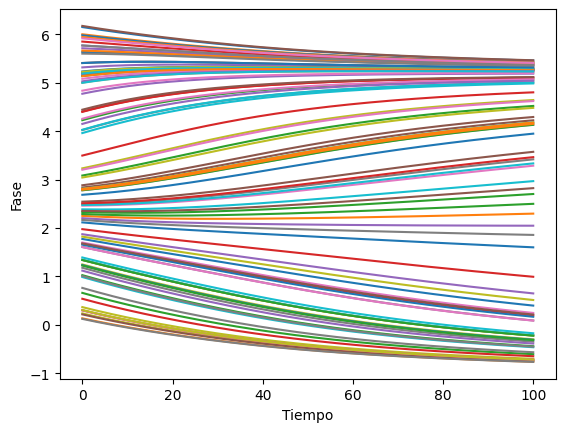

In [ ]:
# Función para calcular la derivada de theta
def kuramoto(theta, omega, K, N):
    dtheta_dt = np.zeros(N)
    for i in range(N):
        for j in range(N):
            dtheta_dt[i] += omega[j] * K/N * np.sin(theta[j] - theta[i])
    return dtheta_dt

# Parámetros del modelo
N = 100 # Número de osciladores
K = 0.5 # Acoplamiento
omega = np.random.normal(loc=0, scale=1, size=N) # Frecuencias naturales aleatorias
theta = np.random.uniform(low=0, high=2*np.pi, size=N) # Fases aleatorias

# Simulación del modelo
dt = 0.01 # Tamaño de paso
T = 100 # Tiempo total de simulación
t = np.arange(0, T, dt)
theta_history = np.zeros((len(t), N))
theta_history[0] = theta
for i in range(1, len(t)):
    k1 = kuramoto(theta_history[i-1], omega, K, N)
    k2 = kuramoto(theta_history[i-1] + k1*dt/2, omega, K, N)
    k3 = kuramoto(theta_history[i-1] + k2*dt/2, omega, K, N)
    k4 = kuramoto(theta_history[i-1] + k3*dt, omega, K, N)
    theta_history[i] = theta_history[i-1] + (k1 + 2*k2 + 2*k3 + k4)*dt/6

# Gráfico de la evolución de las fases
plt.figure()
for i in range(N):
    plt.plot(t, theta_history[:,i])
plt.xlabel('Tiempo')
plt.ylabel('Fase')
plt.show()